# 면담 정리 및 면담 준비 5월 4일
> 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: []

In [1]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

#### 지도학습(Supervised learning) vs 비지도학습(Unsupervised learning) vs 강화학습(Reinforcement learning)

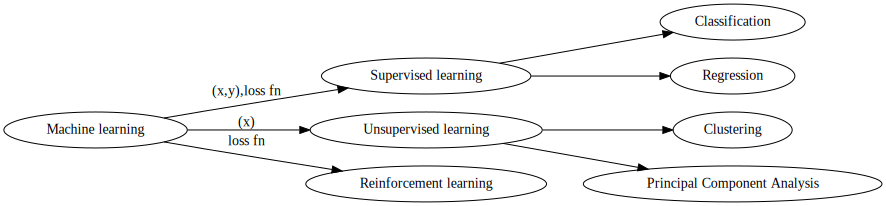

In [9]:
#collapse
gv(''' 
    "Machine learning" -> "Supervised learning"[label="(x,y),loss fn"]
    "Machine learning" -> "Unsupervised learning"[label="(x)"]
    "Machine learning" -> "Reinforcement learning"[label="loss fn"]
    "Supervised learning" -> "Classification"[label=""]
    "Supervised learning" -> "Regression"[label=""]
    "Unsupervised learning" -> "Clustering"[label=""]
    "Unsupervised learning" -> "Principal Component Analysis"[label=""]
''')


- in Supervised Learning, the goal is to **generate formula** based on input and output values. 
    - 입출력값으로 수식을 만드려는 지도학습
- In Unsupervised Learning, we find an **association** between input values and **group** them. 
    - 입력값으로 그룹화하거나 그 사이 관계를 찾으려는 비지도학습
- In Reinforcement Learning an agent learn through delayed feedback by **interacting with the environment**.
    - 환경과 상호작용으로 보상을 통해 배워가려는 강화학습

### 

---

https://cloudxlab.com/blog/object-detection-yolo-and-python-pydarknet/

In [9]:
import numpy as np
import time
import cv2


INPUT_FILE='data/dog.jpg'
OUTPUT_FILE='predicted.jpg'
LABELS_FILE='data/coco.names'
CONFIG_FILE='cfg/yolov3.cfg'
WEIGHTS_FILE='yolov3.weights'
CONFIDENCE_THRESHOLD=0.3

LABELS = open(LABELS_FILE).read().strip().split("\n")

np.random.seed(4)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")


net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

image = cv2.imread(INPUT_FILE)
(H, W) = image.shape[:2]

# determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]


blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
	swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()


print("[INFO] YOLO took {:.6f} seconds".format(end - start))


# initialize our lists of detected bounding boxes, confidences, and
# class IDs, respectively
boxes = []
confidences = []
classIDs = []

# loop over each of the layer outputs
for output in layerOutputs:
	# loop over each of the detections
	for detection in output:
		# extract the class ID and confidence (i.e., probability) of
		# the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]

		# filter out weak predictions by ensuring the detected
		# probability is greater than the minimum probability
		if confidence > CONFIDENCE_THRESHOLD:
			# scale the bounding box coordinates back relative to the
			# size of the image, keeping in mind that YOLO actually
			# returns the center (x, y)-coordinates of the bounding
			# box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")

			# use the center (x, y)-coordinates to derive the top and
			# and left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))

			# update our list of bounding box coordinates, confidences,
			# and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)

# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD,
	CONFIDENCE_THRESHOLD)

# ensure at least one detection exists
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])

		color = [int(c) for c in COLORS[classIDs[i]]]

		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)

# show the output image
cv2.imwrite("example.png", image)